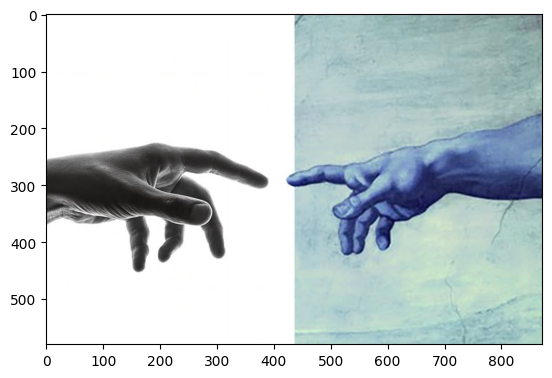

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("images/posing-hands.jpg")
plt.imshow(img)

c:\Users\Ivan\Documents\CMA\ML Parkinsons Repository\Parkinson-Prediagnosis\Instruct\CV_Hand_Model\venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


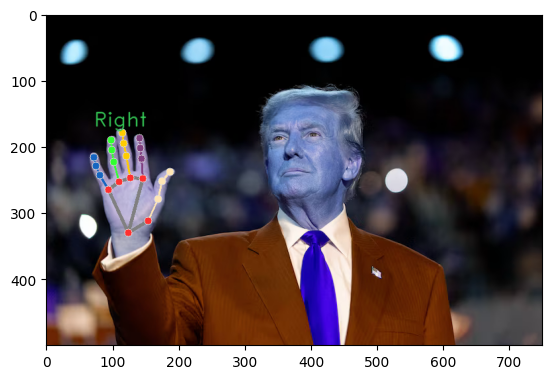

In [3]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from utils.draw_landmarks import draw_landmarks_on_image

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
img = cv2.imread("images/img1.png")

# STEP 3.5: Convert to Mediapip with RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = mp.Image(image_format=mp.ImageFormat.SRGB, data=img)

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(img)

# STEP 5: Process the classification result. In this case, visualize it.
# Function to draw landmarks on the image
#@markdown We implemented some functions to visualize the hand landmark detection results. <br/> Run the following cell to activate the functions.


annotated_image = draw_landmarks_on_image(img.numpy_view(), detection_result)
annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)

plt.imshow(annotated_image)

In [4]:
import cv2
import mediapipe as mp
import pandas as pd
from mediapipe.tasks.python import vision
from utils.draw_landmarks import draw_landmarks_on_image  # Import the function

# Create a HandLandmarker object
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options, num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

video_path = "images/IMG_1906.mp4"
cap = cv2.VideoCapture(video_path)

landmarks_data = []

frame_number = 0  # To keep track of frame number
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print(f"Processing Video...")
        break

    # Convert frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Convert to Mediapipe
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)

    # Detect hand landmarks from the input image
    detection_result = detector.detect(mp_image)

    # Process the classification result
    annotated_frame = draw_landmarks_on_image(frame_rgb, detection_result)
    
    # Extract landmarks
    if detection_result.hand_landmarks:
        for hand_landmarks in detection_result.hand_landmarks:
            for idx, landmark in enumerate(hand_landmarks):
                landmarks_data.append({
                    'Frame': frame_number,
                    'Landmark Index': idx,
                    'X': landmark.x,
                    'Y': landmark.y,
                    'Z': landmark.z
                })

    # Display the annotated frame
    annotated_frame_bgr = cv2.cvtColor(annotated_frame, cv2.COLOR_RGB2BGR)
    cv2.imshow('Hand Landmarks', annotated_frame_bgr)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    frame_number += 1

cap.release()
cv2.destroyAllWindows()

# Create DataFrame
df = pd.DataFrame(landmarks_data)
print(df)


      Frame  Landmark Index         X         Y             Z
0         0               0  0.218992  0.587607  5.433026e-07
1         0               1  0.419347  0.641397  3.021685e-03
2         0               2  0.588827  0.633957  2.025852e-02
3         0               3  0.726380  0.588316  4.229122e-02
4         0               4  0.827614  0.558464  6.941080e-02
...     ...             ...       ...       ...           ...
4531    215              16  0.399443  0.251246 -2.172351e-01
4532    215              17  0.201804  0.474315 -6.836932e-02
4533    215              18  0.185564  0.397264 -1.235648e-01
4534    215              19  0.172955  0.352828 -1.646430e-01
4535    215              20  0.159659  0.317826 -1.921317e-01

[4536 rows x 5 columns]


In [5]:
df.to_csv('landmarks_data.csv', index=False)  # Save DataFrame to CSV
